#### Peter Gansallo
#### HW module 3

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [56]:
auto = pd.read_csv('auto.csv')

In [57]:
auto.head()

mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433          12.0    70   
4  17.0          8         302.0        140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [58]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [59]:
#clean object columns
auto = auto.query("horsepower != '?'")
auto = auto.query("name != '?'")
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


In [60]:
# Convert quantitive datatypes to float 
datatypes = {'quantitative': ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin'],
             'qualitative': ['name']} 

In [61]:
for column in datatypes['quantitative']:
    auto[column] = auto[column].astype(float)

for column in datatypes['qualitative']:
    auto[column] = auto[column].astype(str)


In [62]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   year          392 non-null    float64
 7   origin        392 non-null    float64
 8   name          392 non-null    object 
dtypes: float64(8), object(1)
memory usage: 30.6+ KB


#### (a) Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. 
#### Use the summary() function to print the results. Comment on the output. For example:

In [64]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Add a constant for the intercept
X = sm.add_constant(auto[['horsepower']])
y = auto['mpg']
# Fit the model using OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           7.03e-81
Time:                        18:24:22   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

In [65]:
# Create the data with a single horsepower value of 98
added_hp = pd.DataFrame({'horsepower': [98]})

# Add the constant to this new dataframe to match with the original dataframe
added_hp['const'] = 1.0

# Reorder columns so that 'const' is first
added_hp = added_hp[['const', 'horsepower']]

predicted_mpg = model.predict(added_hp)
print(predicted_mpg)

0    24.467077
dtype: float64


i. Is there a relationship between the predictor and the response? Yes there is a relationship between the predictor (horsepower) and the response (mpg)

ii. How strong is the relationship between the predictor and the response? The relationship is quite string the r squared value suggests horsepower is responsible for 60.6% of the variance in mpg

iii. Is the relationship between the predictor and the response positive or negative? The relationship is negative the coefficient is -0.1578, which means every time horsepower increases by one mpg approximately decreases by .1578

Get 95% intervals

In [68]:
# Get prediction and 95% confidence interval directly using get_prediction
prediction = model.get_prediction(added_hp)

# the associated 95% confidence and prediction intervals
confidence = prediction.conf_int(alpha=0.05)
print(confidence)

#Prediction Interval
predict_interval = prediction.summary_frame(alpha=0.05)
print([predict_interval['obs_ci_lower'].iloc[0], predict_interval['obs_ci_upper'].iloc[0]])

[[23.97307896 24.96107534]]
[14.809396070967123, 34.12475823405774]


#### iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?
The predicted mpg is 24.47 mpg and the 95% confidence and prediction mean intervals are 23.97 mpg and 24.96 mpg for a car with a horsepower of 98, and the predict mpg is expected to fall between 14.81 and 34.12 mpg for a car with 98 horsepower

#### Plot regression line for least squared 

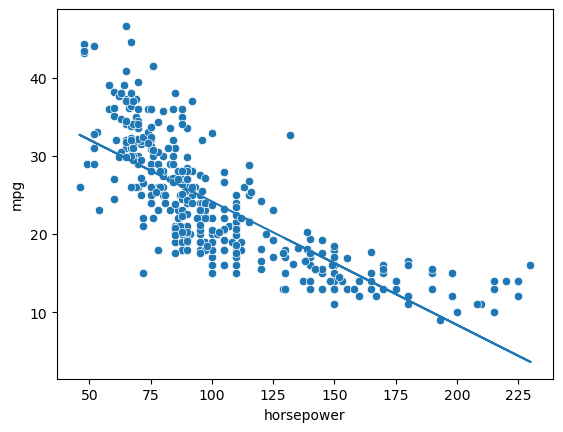

In [71]:
# Let's plot our predicted regression

df = pd.concat([auto['horsepower'], auto['mpg']], axis=1)
ax = sns.scatterplot(x='horsepower', y='mpg', data=df)
ax.plot(auto['horsepower'], model.predict(X));

#### (c) Produce diagnost plots

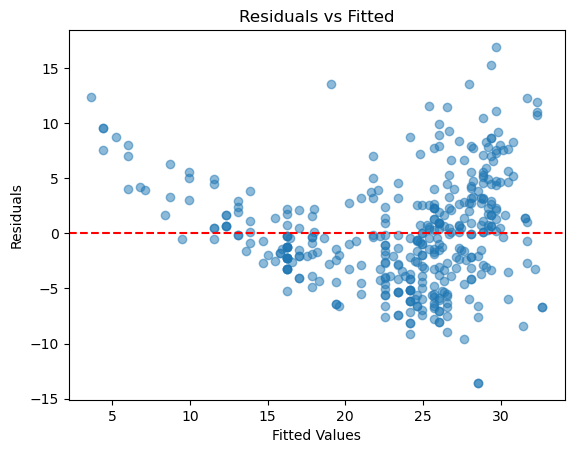

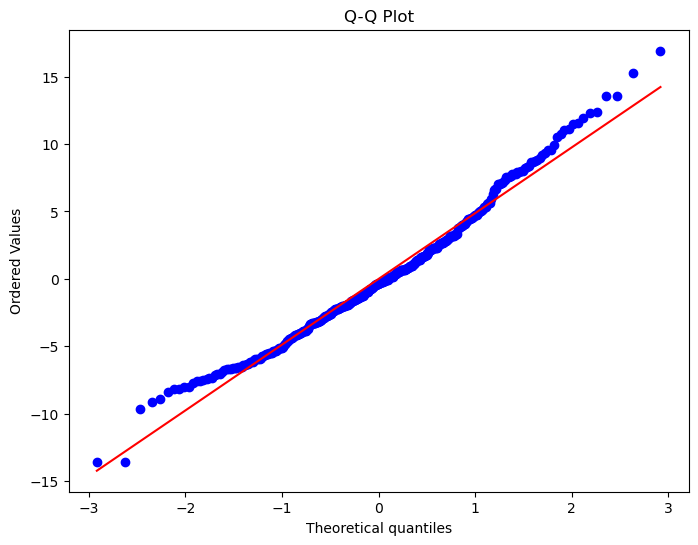

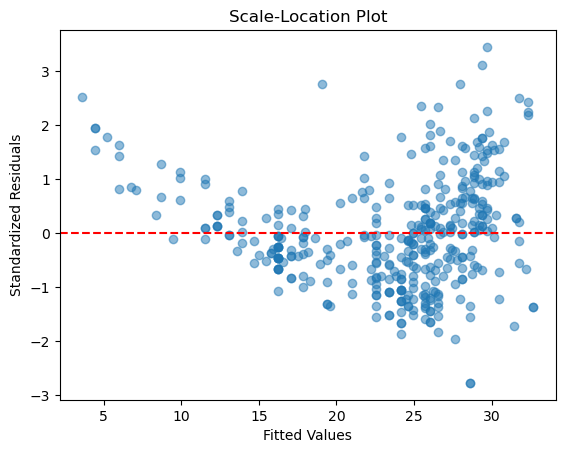

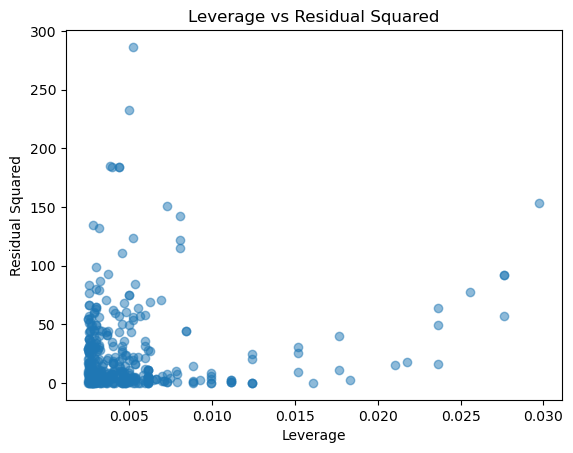

In [73]:
import matplotlib.pyplot as plt

def diagnostic_plots(model):
    # Get residuals
    residuals = model.resid
    fitted_values = model.fittedvalues
    
    plt.scatter(fitted_values, residuals, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    
    plt.title('Residuals vs Fitted')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.show()

    # Q-Q plot
    plt.figure(figsize=(8,6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    plt.show()

    # Calculate the standardized residuals
    std_residuals = residuals / residuals.std()
    
    plt.scatter(fitted_values, std_residuals, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Scale-Location Plot')
    plt.xlabel('Fitted Values')
    plt.ylabel('Standardized Residuals')
    plt.show()

    # Leverage values and residuals
    leverage = model.get_influence().hat_matrix_diag
    residual_squared = residuals ** 2
    
    # Create leverage vs residual squared plot
    plt.scatter(leverage, residual_squared, alpha=0.5)
    plt.title('Leverage vs Residual Squared')
    plt.xlabel('Leverage')
    plt.ylabel('Residual Squared')
    plt.show()

diagnostic_plots(model)

### Question 2

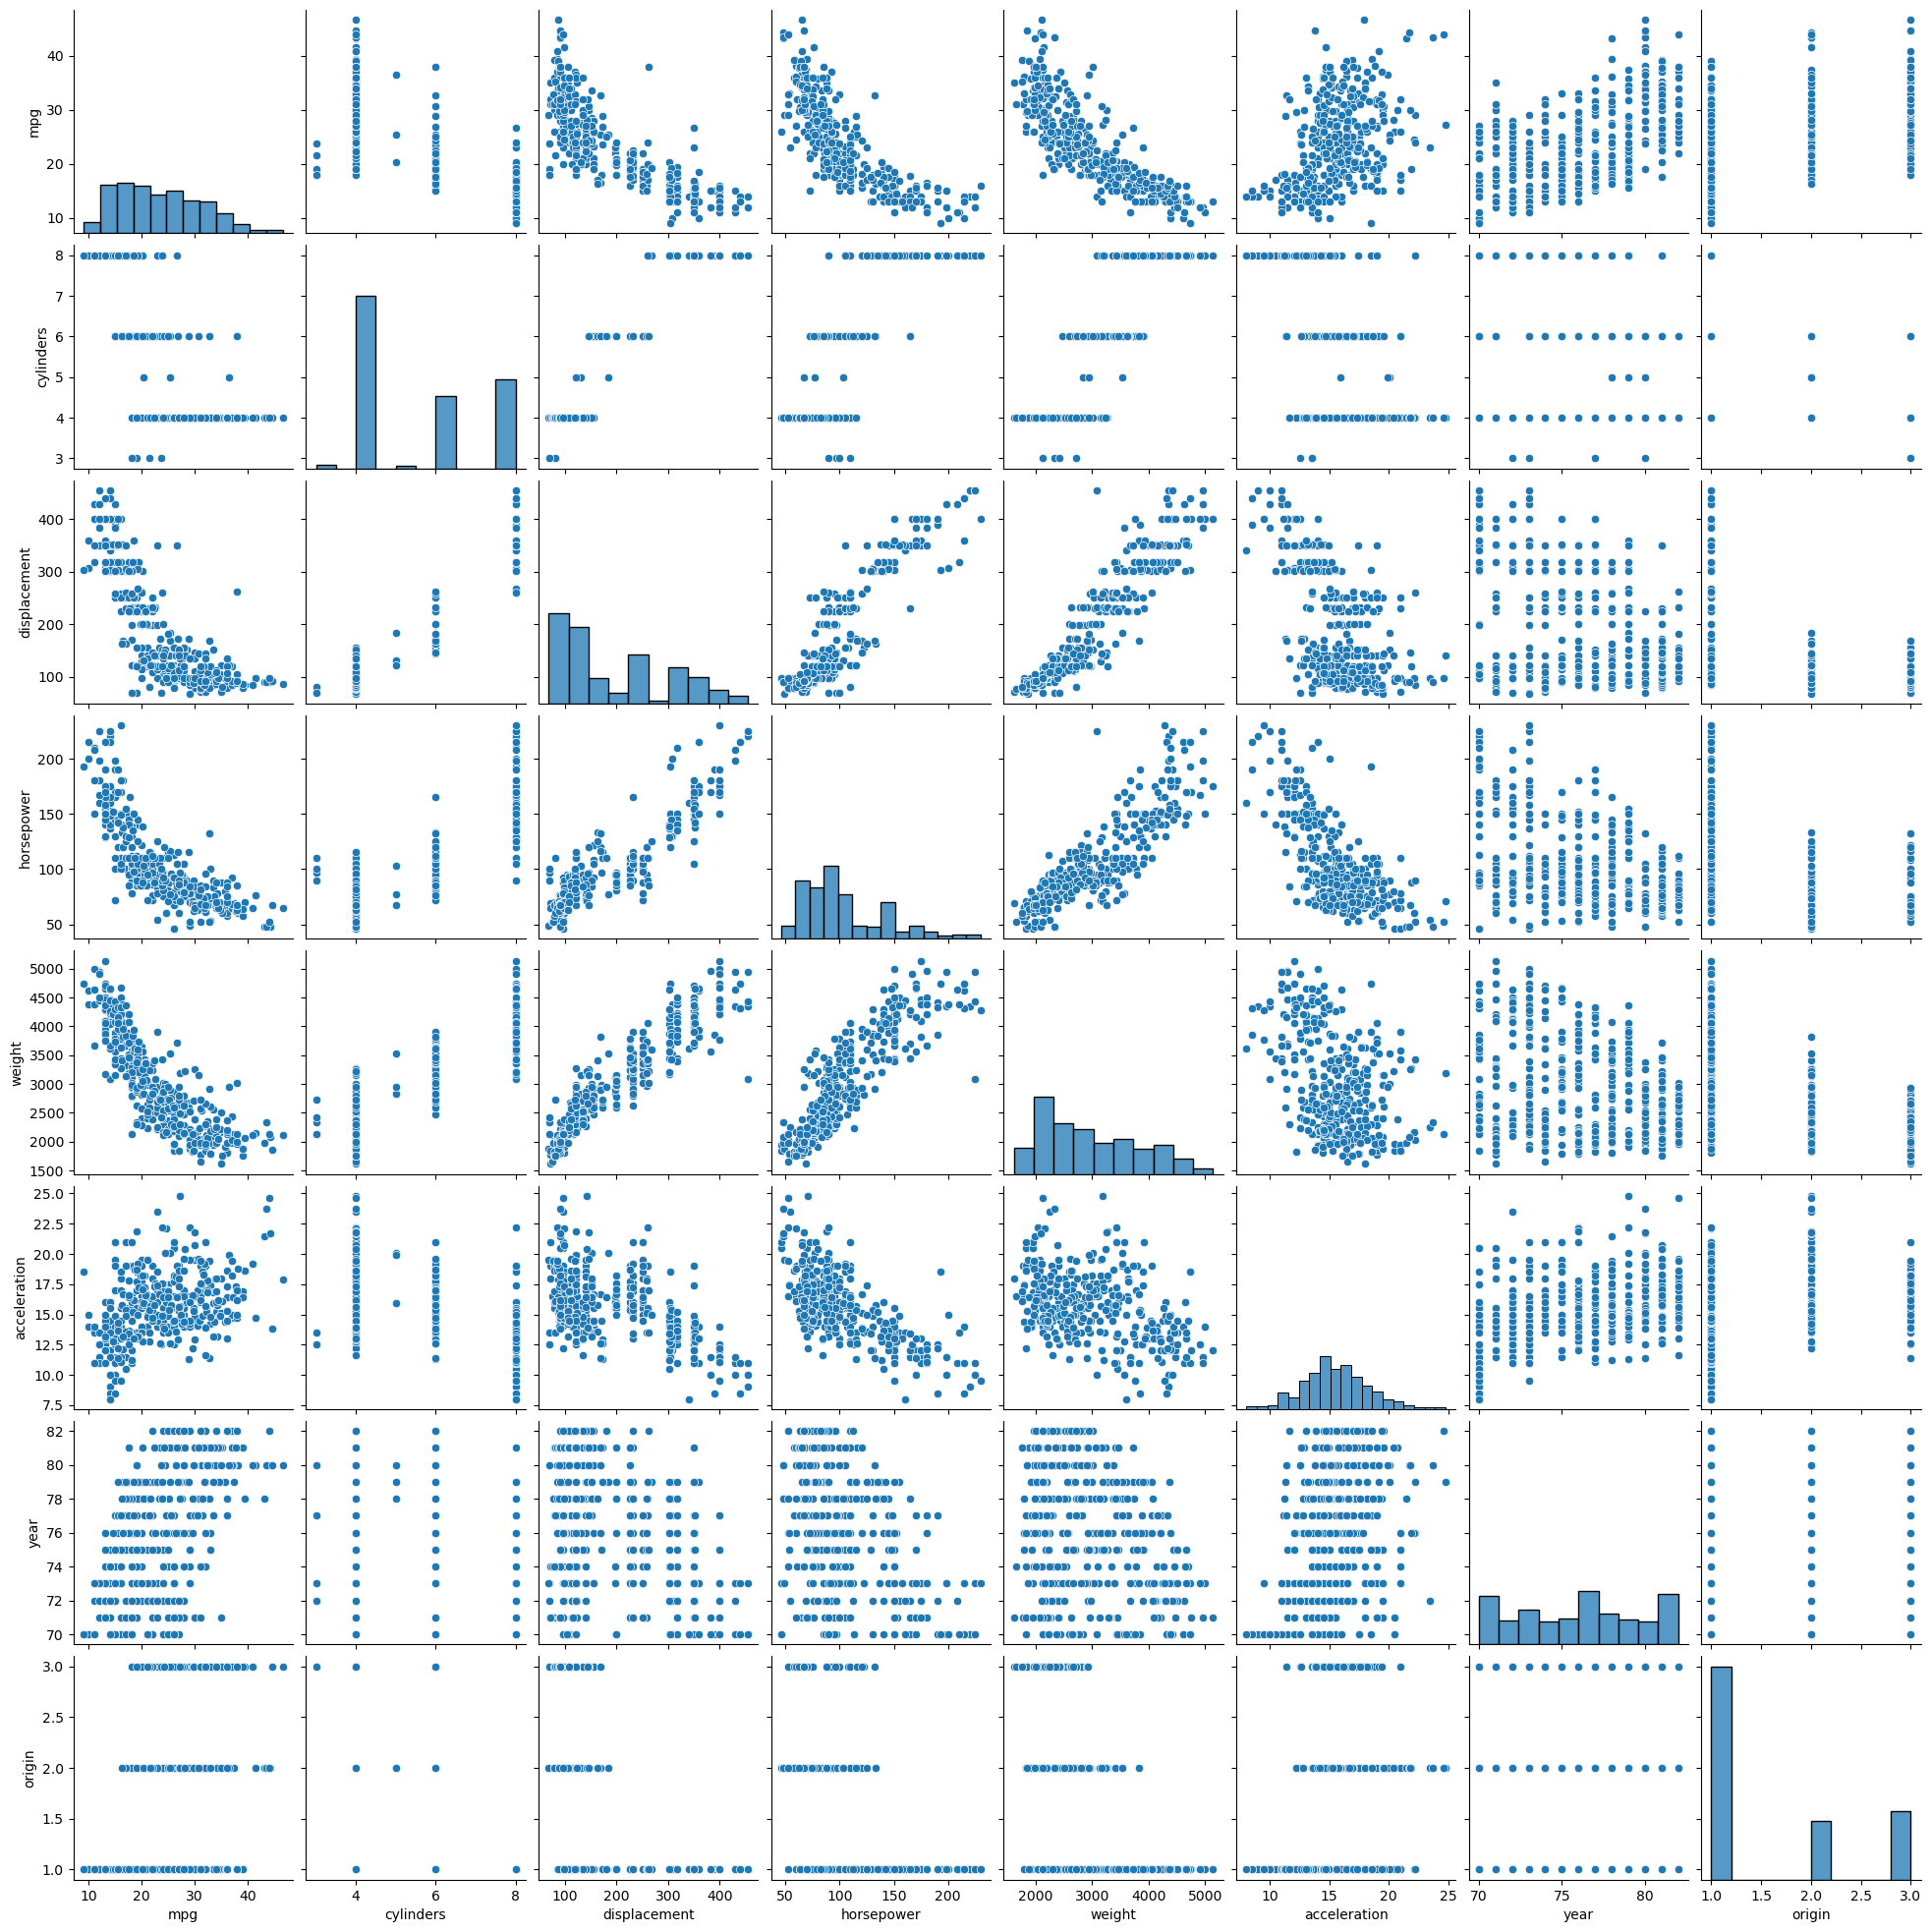

In [75]:
df = auto  # Assuming 'auto' is your dataset

# Create a scatterplot matrix
sns.pairplot(df)
plt.show()


Correlation

In [77]:
# Select only the numeric columns
numeric_columns = auto.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print(correlation_matrix)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  

In [78]:
# Add a constant for the intercept
X = sm.add_constant(auto.drop(['name','mpg'],axis=1))
y = auto['mpg']
# Fit the model using OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          2.04e-139
Time:                        18:24:37   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

In [79]:
from statsmodels.stats.anova import anova_lm

# Perform ANOVA to check the overall relationship between predictors and the response
import statsmodels.formula.api as smf

# Assuming 'auto' is your DataFrame and 'name' is a non-numeric column
# Define the formula: 'mpg' as the response and all other variables as predictors
formula = 'mpg ~ ' + ' + '.join([col for col in auto.columns if col != 'mpg' and col != 'name'])

# Fit the model using the formula API
model = smf.ols(formula=formula, data=auto).fit()
print( model.summary())
anova_results = anova_lm(model)
print(anova_results)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          2.04e-139
Time:                        18:24:37   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

#### i
Based on the results from the anova_lm() function, there is a clear relationship between the predictors and the response variable, mpg. Almost all the predictors, such as cylinders, displacement, weight, and year, have very small p-values, meaning they have a significant impact on mpg as all of them are less than .05. For example, the p-values for the predictors, cylinders (2.32e-125) and year (1.87e-39) are extremely close to zero, show a strong relationship. However, acceleration has a high p-value (0.767), indicating that it does not have a significant effect on mpg. Since many of the predictors show a strong influence on the response variable, we can confidently conclude that there is a relationship between them and mpg.

#### ii
All the predictors except for acceleration are statistically significant when using anova, but when using OLS it suggests just weight, year and origin are statistically significant

#### iii
For each additional year, the mpg (miles per gallon) increases by 0.7508 (assuming all other variables are held constant).

#### produce diagnostic plots

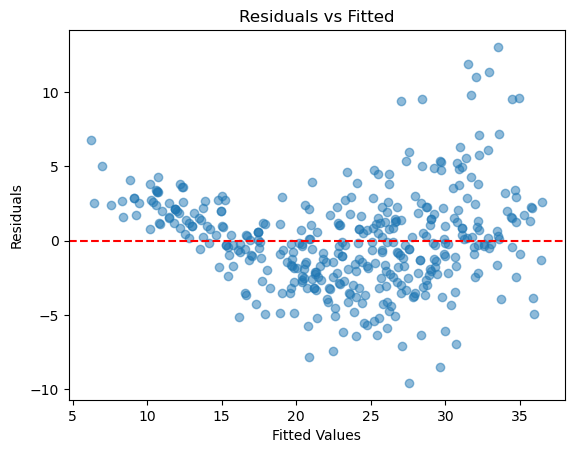

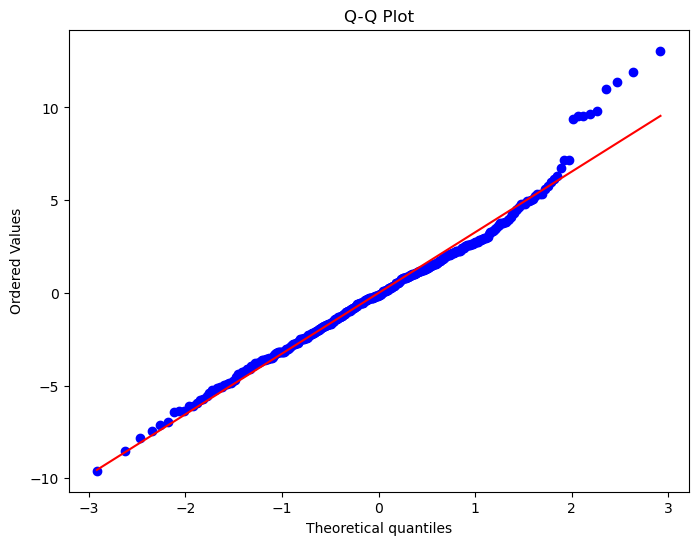

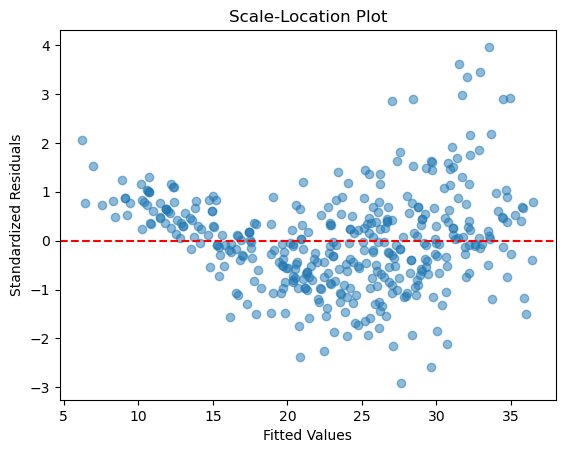

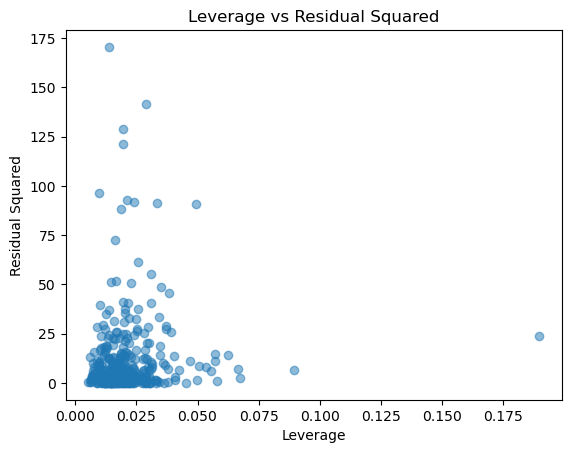

In [82]:
diagnostic_plots(model)

#### iv
The plots reveal some potential issues with the model fit. The Residuals vs. Fitted and Scale-Location plots suggest the spread of residuals is not consistent across fitted values. This indicates that the variance of errors is not constant, which can affect the reliability of predictions. The Q-Q Plot shows some deviations at the tails, suggesting that the residuals may not be perfectly normally distributed. The Leverage vs. Residual Squared plot highlights a few points with high residual values, indicating potential outliers. However, most points have low leverage, meaning there are no extreme influential observations significantly affecting the model fit.